In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import DBSCAN

In [2]:
#смотрим данные
data = pd.read_csv('databank1.csv', delimiter=';')
data.head()

,Unnamed: 0,CreditSum,sex,age,EducationStatus,kolichestvo_rabotnikov_v_organizacii,Employment,OrgStanding_N,kolichestvo_detej_mladshe_18,Residence,ConfirmedMonthlyIncome (Target)
0,0,500000.0,0,49,4,3,1,1.25,0,1,30691.36
1,1,708000.0,0,44,2,0,3,20.00,0,0,25712.07
2,2,665000.0,1,29,4,2,1,2.00,1,1,31081.26
3,3,458000.0,0,59,5,1,1,23.00,0,0,17848.79
4,4,969000.0,1,51,4,3,1,9.25,2,1,115380.53


In [3]:
data.pop('Unnamed: 0')
data.pop('kolichestvo_rabotnikov_v_organizacii')
data.pop('Employment')
data.pop('EducationStatus')
data.pop('Residence')
data.pop('sex')
data.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.0,49,1.25,0,30691.36
1,708000.0,44,20.00,0,25712.07
2,665000.0,29,2.00,1,31081.26
3,458000.0,59,23.00,0,17848.79
4,969000.0,51,9.25,2,115380.53


In [4]:
from sklearn.preprocessing import StandardScaler

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
cluster_pred,,,,,
-1,1243,1243,1243,1243,1243
0,5580,5580,5580,5580,5580
1,2335,2335,2335,2335,2335
2,1255,1255,1255,1255,1255
3,9,9,9,9,9
4,59,59,59,59,59
5,9,9,9,9,9
6,9,9,9,9,9
7,6,6,6,6,6


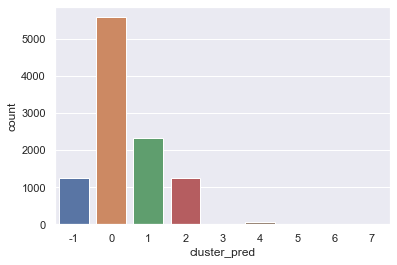

In [5]:
stscaler = StandardScaler().fit(data)
db11 = stscaler.transform(data)
dbsc = DBSCAN(eps = .5, min_samples = 7).fit(db11)
clusters_scaled = data.copy()
clusters_scaled['cluster_pred']=dbsc.fit_predict(db11)
clusters_scaled
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

In [6]:
clusters_scaled

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.00,49,1.250000,0,30691.360,0
1,708000.00,44,20.000000,0,25712.070,0
2,665000.00,29,2.000000,1,31081.260,1
3,458000.00,59,23.000000,0,17848.790,0
4,969000.00,51,9.250000,2,115380.530,-1
5,35000.00,35,5.500000,0,39578.970,0
6,701000.00,54,1.500000,0,50052.420,0
7,710000.00,34,9.250000,2,100050.000,-1
8,240000.00,26,3.916666,0,34000.580,0
9,120400.00,23,3.000000,0,47266.040,0


In [7]:
clusters_scaled.to_csv("dbscandata.csv", sep=';')

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\nonparametric

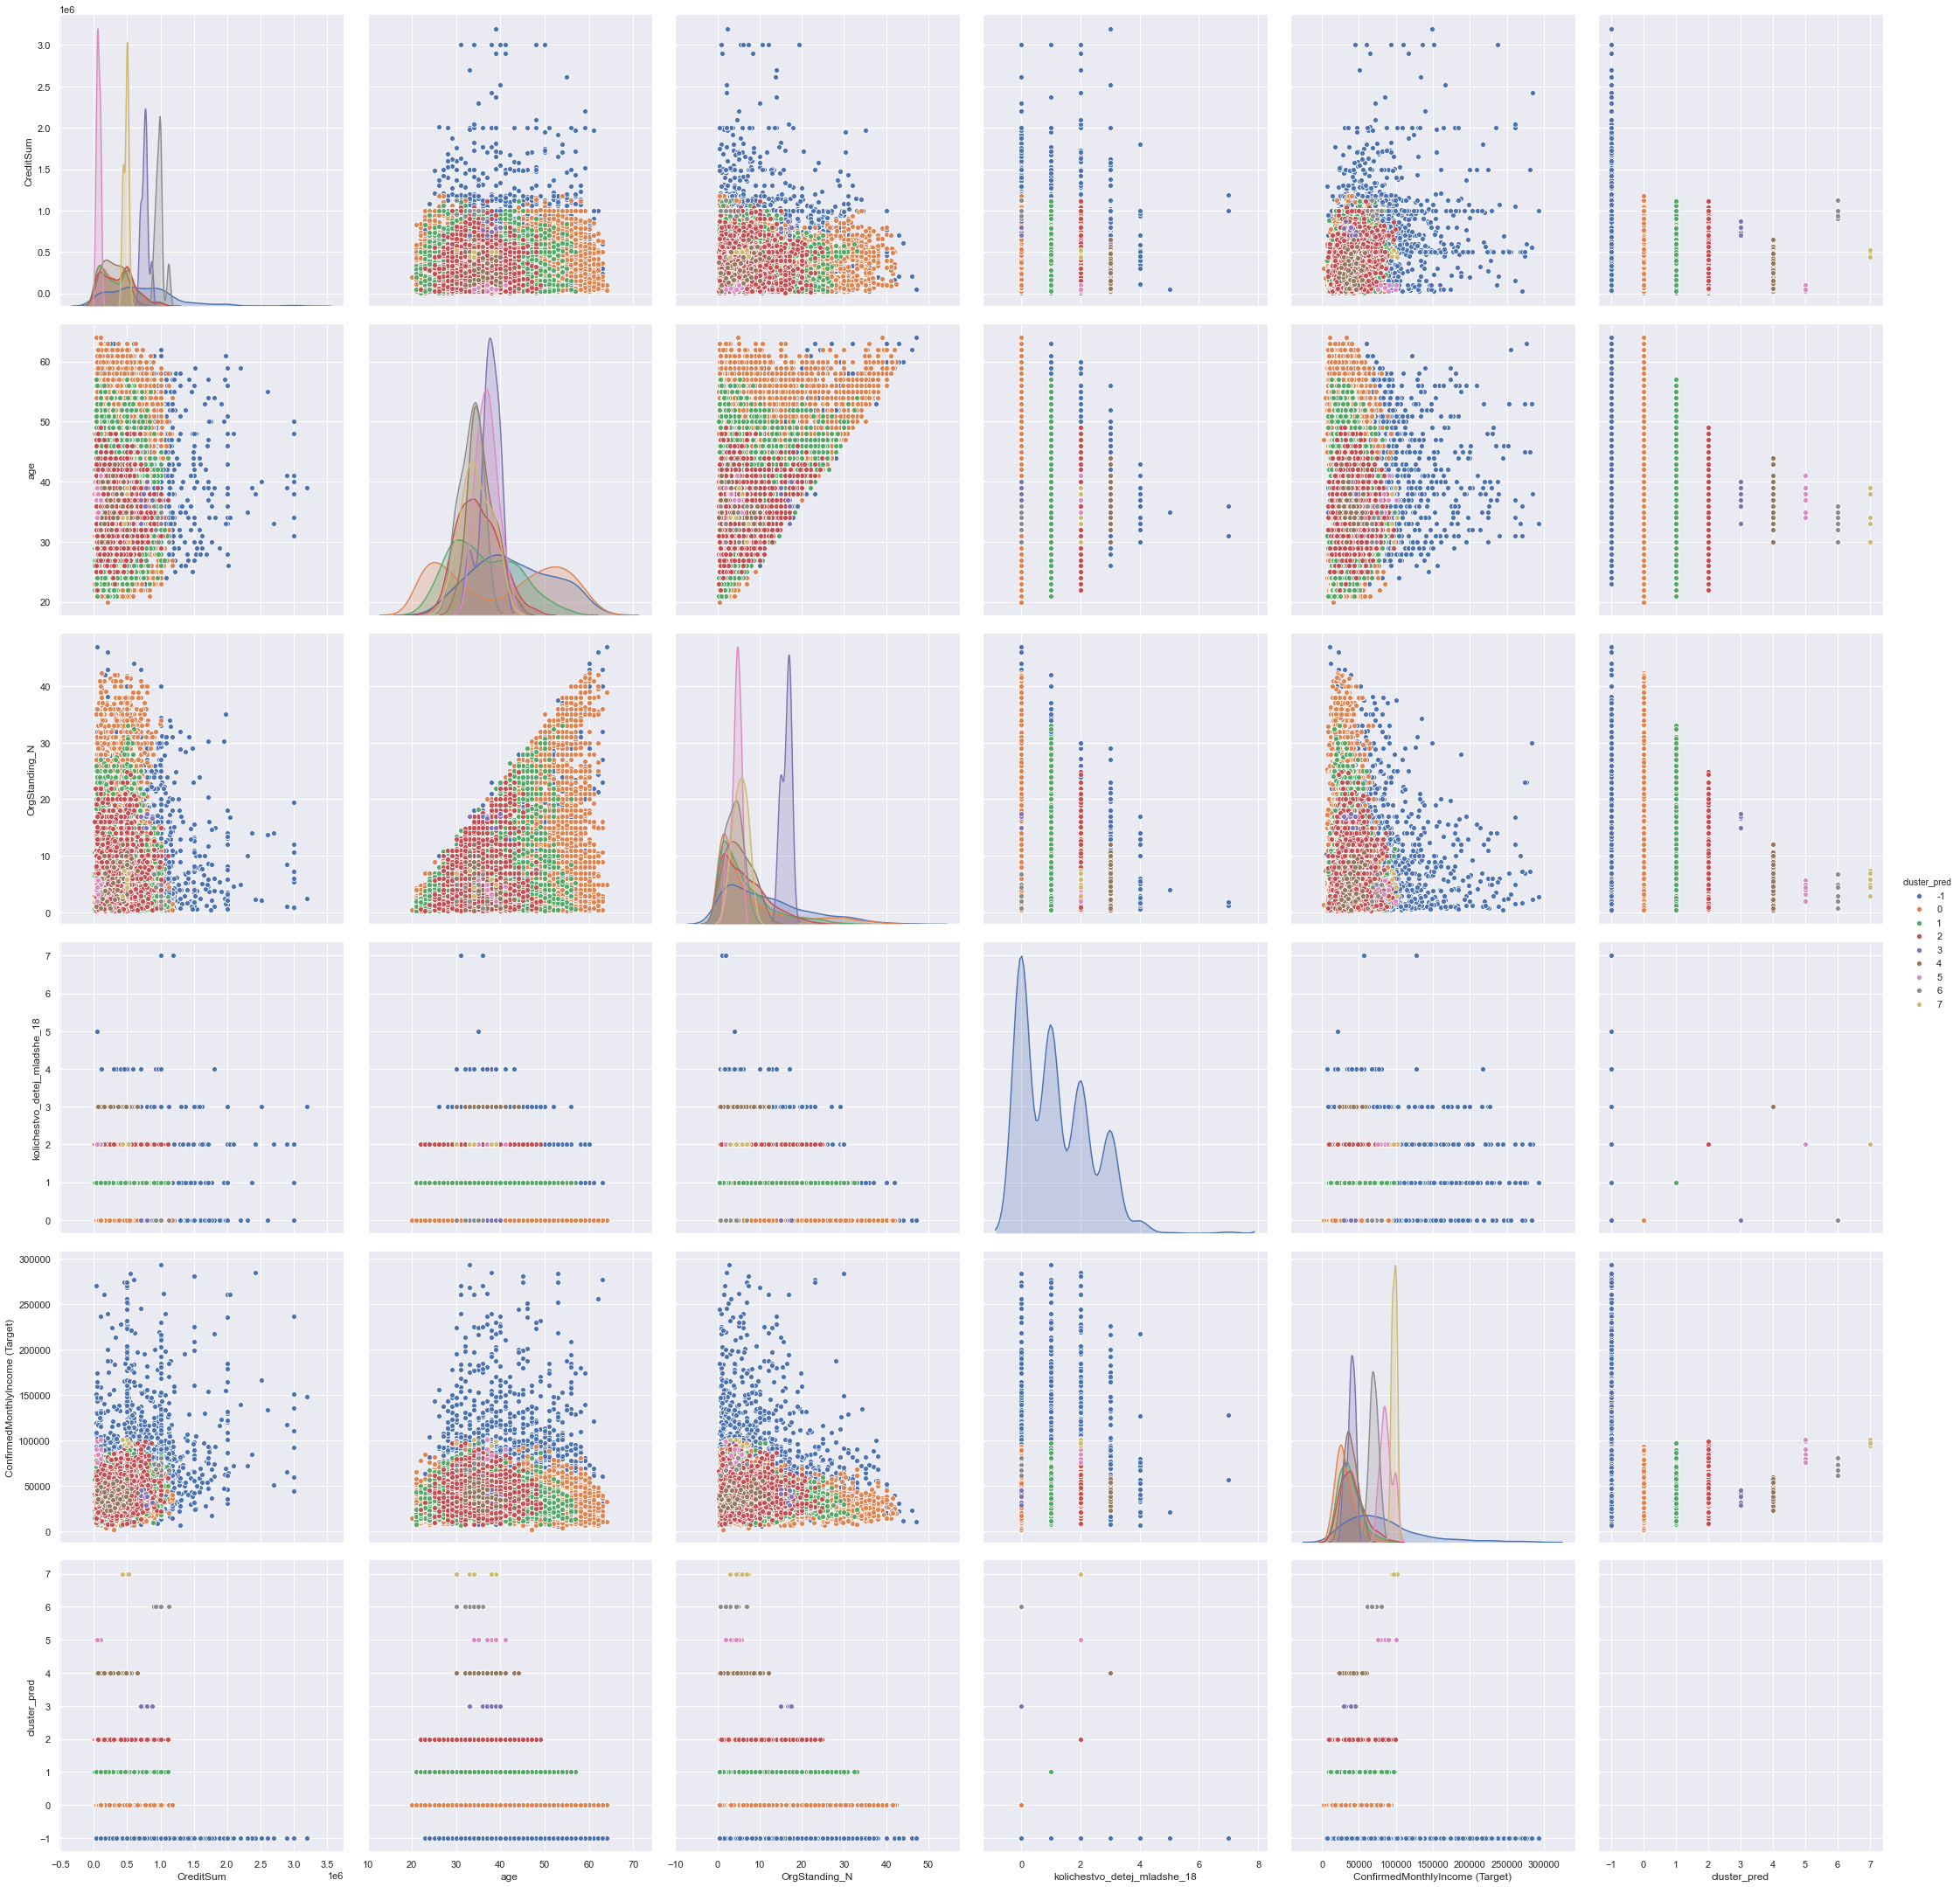

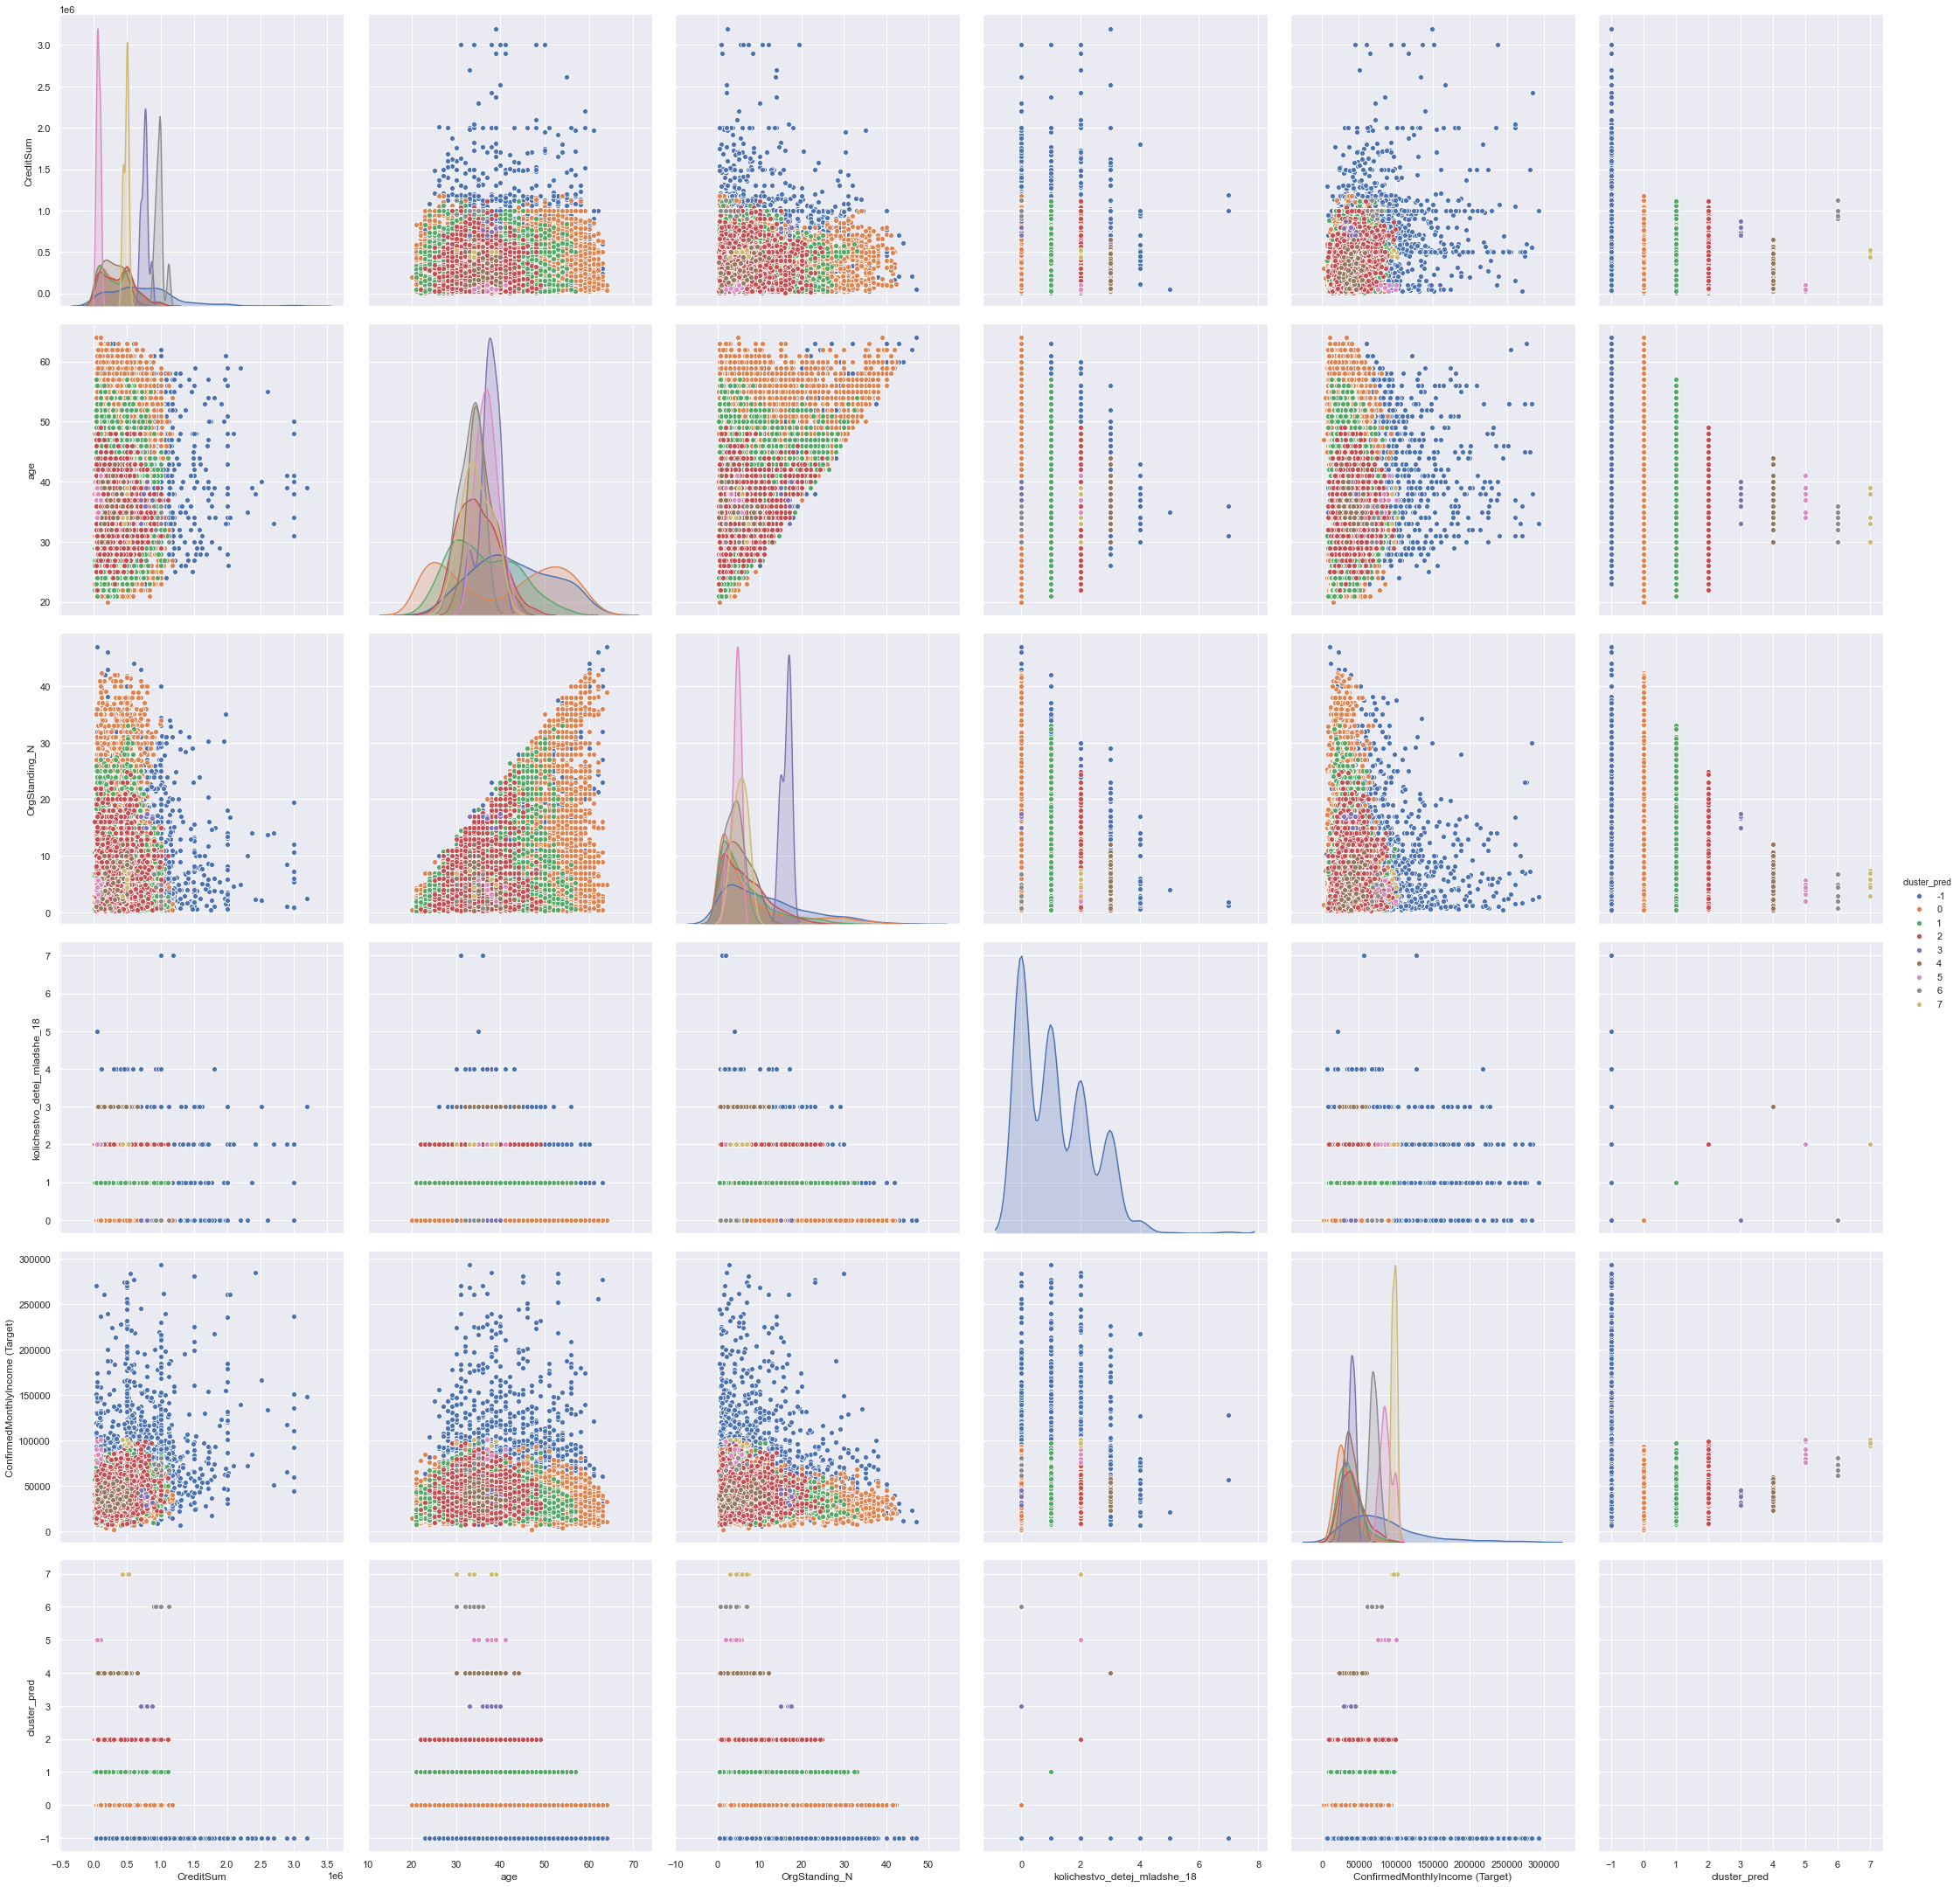

In [9]:
sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot = sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot.savefig("dbscanimg.png")

In [28]:
Cs=[0,0,0,0,0,0,0,0]
lenght=[0,0,0,0,0,0,0,0]
CsCentr=[0,0,0,0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            Cs[j]=Cs[j] + clusters_scaled['CreditSum'][i]
            lenght[j]=lenght[j]+1
            CsCentr[j]=Cs[j]/lenght[j]
print(CsCentr)

[353357.6648494623, 355091.87428265536, 369333.26746613544, 767617.5555555555, 293631.3444067797, 70428.33222222222, 985655.5555555555, 484688.5933333333]


In [29]:
age=[0,0,0,0,0,0,0,0]
lenght=[0,0,0,0,0,0,0,0]
ageCentr=[0,0,0,0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            age[j]=age[j] + clusters_scaled['age'][i]
            lenght[j]=lenght[j]+1
            ageCentr[j]=age[j]/lenght[j]
print(ageCentr)

[40.237096774193546, 36.2372591006424, 35.003187250996014, 37.55555555555556, 35.847457627118644, 37.0, 33.333333333333336, 34.666666666666664]


In [30]:
OrgStanding_N=[0,0,0,0,0,0,0,0]
lenght=[0,0,0,0,0,0,0,0]
OrgStanding_NCentr=[0,0,0,0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            OrgStanding_N[j]=OrgStanding_N[j] + clusters_scaled['OrgStanding_N'][i]
            lenght[j]=lenght[j]+1
            OrgStanding_NCentr[j]=OrgStanding_N[j]/lenght[j]
print(OrgStanding_NCentr)

[8.009512963799231, 6.506852063383257, 6.562416831872486, 16.351851777777778, 5.128530966101695, 4.416666444444444, 3.7685183333333327, 5.458333166666667]


In [31]:
kd=[0,0,0,0,0,0,0,0]
lenght=[0,0,0,0,0,0,0,0]
kdCentr=[0,0,0,0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            kd[j]=kd[j] + clusters_scaled['kolichestvo_detej_mladshe_18'][i]
            lenght[j]=lenght[j]+1
            kdCentr[j]=kd[j]/lenght[j]
print(kdCentr)

[0.0, 1.0, 2.0, 0.0, 3.0, 2.0, 0.0, 2.0]


In [32]:
target=[0,0,0,0,0,0,0,0]
lenght=[0,0,0,0,0,0,0,0]
targetCentr=[0,0,0,0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            target[j]=target[j] + clusters_scaled['ConfirmedMonthlyIncome (Target)'][i]
            lenght[j]=lenght[j]+1
            targetCentr[j]=target[j]/lenght[j]
print(targetCentr)

[31602.513617921122, 37205.05704068526, 41033.27677290841, 39178.543333333335, 38814.67694915255, 87595.45333333332, 70623.27333333333, 98016.46]


In [33]:
B=[CsCentr,ageCentr,OrgStanding_NCentr,kdCentr,targetCentr]
clustCentr = np.asarray(B)
clustCentr = np.transpose(clustCentr)
clustCentr

array([[3.53357665e+05, 4.02370968e+01, 8.00951296e+00, 0.00000000e+00,
        3.16025136e+04],
       [3.55091874e+05, 3.62372591e+01, 6.50685206e+00, 1.00000000e+00,
        3.72050570e+04],
       [3.69333267e+05, 3.50031873e+01, 6.56241683e+00, 2.00000000e+00,
        4.10332768e+04],
       [7.67617556e+05, 3.75555556e+01, 1.63518518e+01, 0.00000000e+00,
        3.91785433e+04],
       [2.93631344e+05, 3.58474576e+01, 5.12853097e+00, 3.00000000e+00,
        3.88146769e+04],
       [7.04283322e+04, 3.70000000e+01, 4.41666644e+00, 2.00000000e+00,
        8.75954533e+04],
       [9.85655556e+05, 3.33333333e+01, 3.76851833e+00, 0.00000000e+00,
        7.06232733e+04],
       [4.84688593e+05, 3.46666667e+01, 5.45833317e+00, 2.00000000e+00,
        9.80164600e+04]])

In [34]:
stscaler1 = StandardScaler().fit(clustCentr)
clustCentr = stscaler1.transform(clustCentr)
clustCentr

array([[-3.95425375e-01,  2.03655730e+00,  2.63148861e-01,
        -1.14707867e+00, -9.83538849e-01],
       [-3.88993522e-01,  1.11422746e-03, -1.38631759e-01,
        -2.29415734e-01, -7.53040810e-01],
       [-3.36174901e-01, -6.26882008e-01, -1.23774882e-01,
         6.88247202e-01, -5.95541426e-01],
       [ 1.14098583e+00,  6.71970799e-01,  2.49371868e+00,
        -1.14707867e+00, -6.71848272e-01],
       [-6.16938947e-01, -1.97248500e-01, -5.07166472e-01,
         1.60591014e+00, -6.86818346e-01],
       [-1.44475650e+00,  3.89258899e-01, -6.97504405e-01,
         6.88247202e-01,  1.32010466e+00],
       [ 1.94964734e+00, -1.47663964e+00, -8.70805879e-01,
        -1.14707867e+00,  6.21840689e-01],
       [ 9.16560796e-02, -7.98131080e-01, -4.18984147e-01,
         6.88247202e-01,  1.74884236e+00]])

In [35]:
import math
from math import sqrt

In [36]:
kolKl=8
kolOb=5

In [37]:
# кол-во элементов в каждом кластере
N = [0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    N[l] = clusters_scaled.groupby(['cluster_pred'])['CreditSum'].count()[l]
    print(N[l])

5580
2335
1255
9
59
9
9
6


In [38]:
# общий центр (координаты)
obcentrx = [0,0,0,0,0,0,0,0,0,0,0]
# j - номер признака
for j in range(0,kolOb):
    for l in range(0,kolKl):
        obcentrx[j] = obcentrx[j]+N[l]*clustCentr[l][j]
    obcentrx[j]=obcentrx[j]/9262
    print(obcentrx[j])

-0.3841189312234946
1.140108983792689
0.10421290845526768
-0.6465352499988559
-0.8650939226325545


In [39]:
# вычисляем евклидово расстояние от центра кластера до общего центра
d=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
d2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    for j in range(0,kolOb):
        d2[l] = d2[l]+(clustCentr[l][j]-obcentrx[j])**2 
        d[l] = math.sqrt(d2[l])
    print(d[l])
    print(d2[l])
    print('------')

1.0457442204077603
1.0935809745162344
------
1.2421155098167966
1.5428509397274404
------
2.2429527341655255
5.030836967700607
------
2.9227937559540673
8.542723339844084
------
2.705883838806304
7.32180734911314
------
2.981311049569309
8.888215574284054
------
3.9630819117297915
15.70601823907986
------
3.587642490518212
12.87117863977172
------


In [40]:
# средневзвешенный разброс от центра кластера до общего центра (межкластерное расстояние)
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*d[l]
    k2=k2+N[l]*d2[l]
k=k/9262
k2=k2/9262
print (k)
print (k2)
SSM=k2

1.2762336243320251
1.8166579028658603


In [41]:
# средний разброс в каждом кластере от объектов до центра кластера
s1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0, 10505):
    #dd - расстояние от i-го объекта до центра его кластера
    dd=0
    dd2=0
    l=clusters_scaled['cluster_pred'][i]
    a1[l]=a1[l]+1
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-clustCentr[l][j])**2
    dd= math.sqrt(dd2)   
    s1[l] = s1[l]+ dd
    s2[l]=s2[l]+dd2
for l in range(0, kolKl):
    s1[l]=s1[l]/a1[l]
    s2[l]=s2[l]/a1[l]
    print(a1[l])
    print(s1[l])
    print(s2[l])

5580
2.6420002549380484
7.856543060950783
2335
1.6547357891989036
2.9585959545469662
1255
1.6747495720808454
2.9854651466538686
9
1.8707892205644636
3.5276463786073027
59
1.620648825580251
2.679528430923238
9
1.348589875582289
1.8296243022391296
9
1.26092687581192
1.6331375921742126
6
1.19583989800681
1.4375868396644662


In [42]:
# средний внутрикластерный разброс по всем кластерам
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*s1[l]
    k2=k2+N[l]*s2[l]
k=k/10507
k2=k2/10507
print (k)
print (k2)
SSV=k2

1.9844956959303426
5.208358424473475


In [43]:
# средний разброс от объектов до общего центра 
s2=0
s4=0
for i in range(0, 10505):
    #dd - расстояние от i-го объекта до общего центра
    dd=0
    dd2=0
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-obcentrx[j])**2
    dd= math.sqrt(dd2)   
    s2 = s2+dd
    s4 = s4+dd2
s2=s2/9262
s4=s4/9262
print(s2)
print(s4)
SS=s4

2.867659684120499
8.64791233416803


In [44]:
# доля межгруппового разброса в общем разбросе
dol=SSM/SS
dol

0.21006895452538504

In [7]:
import researchpy as rp
rp.summary_cont(clusters_scaled['CreditSum'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CreditSum,10505.0,401146.6904,309452.4029,3019.2274,395228.4314,407064.9494


In [12]:
rp.summary_cont(clusters_scaled['ConfirmedMonthlyIncome (Target)'].groupby(clusters_scaled['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
-1,1243,82004.6859,50808.4768,1441.1215,79177.3844,84831.9875
0,5580,31602.5136,13620.8184,182.3417,31245.0528,31959.9744
1,2335,37205.0570,14607.3048,302.2920,36612.2682,37797.8459
2,1255,41033.2768,16387.1802,462.5752,40125.7701,41940.7835
3,9,39178.5433,5759.0744,1919.6915,34751.7269,43605.3598
4,59,38814.6769,9032.5728,1175.9408,36460.7756,41168.5783
5,9,87595.4533,8343.9852,2781.3284,81181.6986,94009.2081
6,9,70623.2733,5622.7999,1874.2666,66301.2067,74945.3400
7,6,98016.4600,2935.8943,1198.5738,94935.4279,101097.4921


In [47]:
# дисперсионный анализ
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats

In [48]:
stats.f_oneway(clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 7])

F_onewayResult(statistic=16.362936199854236, pvalue=1.4448930200567612e-21)

In [49]:
stats.f_oneway(clusters_scaled['age'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 7])

F_onewayResult(statistic=54.64626366719962, pvalue=5.642772654053009e-77)

In [50]:
stats.f_oneway(clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 7])

F_onewayResult(statistic=13.613362695856878, pvalue=1.2553783384948633e-17)

In [51]:
stats.f_oneway(clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 7])

F_onewayResult(statistic=-7.544475755490289e+18, pvalue=nan)

In [52]:
stats.f_oneway(clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 4],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 5],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 6],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 7])

F_onewayResult(statistic=126.94792279164182, pvalue=5.593777954122521e-179)

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred,3.988286e+13,1.0,433.638425,2.088017e-94
Residual,9.659885e+14,10503.0,NaN,NaN


In [54]:
bins = [-1, 0, 1, 2, 3,4,5,6,20]
labels = ['Нулевой', 'Первый','Второй','Третий','Четвертый','Пятый','Шестой','Седьмой']

clusters_scaled['cluster_pred_cat'] = pd.cut(clusters_scaled['cluster_pred'], bins=bins, labels=labels)

In [55]:
clusters_scaled.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred,cluster_pred_cat
0,500000.0,49,1.25,0,30691.36,0,Нулевой
1,708000.0,44,20.00,0,25712.07,0,Нулевой
2,665000.0,29,2.00,1,31081.26,1,Первый
3,458000.0,59,23.00,0,17848.79,0,Нулевой
4,969000.0,51,9.25,2,115380.53,-1,NaN


In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,6.418348e+12,7.0,16.362936,1.444893e-21
Residual,5.185534e+14,9254.0,NaN,NaN


In [66]:
model = ols('age ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,4.490489e+04,7.0,54.646264,5.642773e-77
Residual,1.086337e+06,9254.0,NaN,NaN


In [68]:
model = ols('OrgStanding_N ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,6061.041726,7.0,13.613363,1.255378e-17
Residual,588590.588616,9254.0,NaN,NaN


In [70]:
model = ols('kolichestvo_detej_mladshe_18 ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,5.190364e+03,7.0,1.784951e+31,0.0
Residual,3.844173e-25,9254.0,NaN,NaN


In [71]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
cluster_pred_cat,5.190364e+03,7.0,7.414805e+02,1.784951e+31,0.0,1.0,1.0
Residual,3.844173e-25,9254.0,4.154067e-29,NaN,NaN,NaN,NaN


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000001F0D1A79550>
Exception in Tkinter callback
Traceback (mo

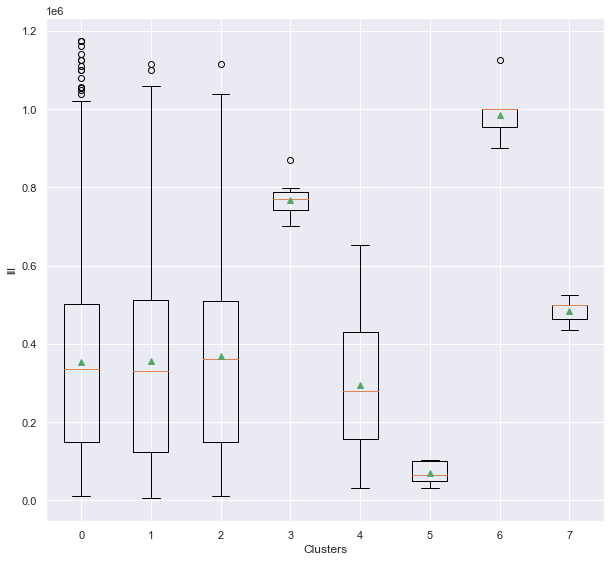

In [32]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

# ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 5],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 6],
        clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 7]]

ax.boxplot(data,
           labels= ['0', '1', '2', '3', '4','5', '6', '7'],
           showmeans= True)

plt.xlabel("Clusters")
plt.ylabel("lll")

plt.show()


In [72]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
-1,0,-381165.0557,0.001,-408737.348,-353592.7633,True
-1,1,-379430.8462,0.001,-410296.7512,-348564.9413,True
-1,2,-365189.453,0.001,-400367.8984,-330011.0077,True
-1,3,33094.835,0.9,-260997.1567,327186.8268,False
-1,4,-440891.3761,0.001,-558025.0527,-323757.6995,True
-1,5,-664094.3883,0.001,-958186.3801,-370002.3965,True
-1,6,251132.835,0.1668,-42959.1567,545224.8268,False
-1,7,-249834.1272,0.439,-609589.9923,109921.7379,False
0,1,1734.2094,0.9,-19932.9895,23401.4084,False
0,2,15975.6026,0.6556,-11488.6731,43439.8783,False


In [34]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl


group1,group2,stat,pval,pval_corr,reject
-1,0,40.0554,0.0,0.0,True
-1,1,29.9008,0.0,0.0,True
-1,2,22.9487,0.0,0.0,True
-1,3,-0.1942,0.846,1.0,False
-1,4,6.6115,0.0,0.0,True
-1,5,3.8978,0.0001,0.0037,True
-1,6,-1.4739,0.1408,1.0,False
-1,7,1.1973,0.2314,1.0,False
0,1,-0.2962,0.7671,1.0,False
0,2,-2.1852,0.0289,1.0,False


In [35]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
-1,0,40.0554,0.0,0.0,True
-1,1,29.9008,0.0,0.0,True
-1,2,22.9487,0.0,0.0,True
-1,3,-0.1942,0.846,1.0,False
-1,4,6.6115,0.0,0.0,True
-1,5,3.8978,0.0001,0.0037,True
-1,6,-1.4739,0.1408,0.9958,False
-1,7,1.1973,0.2314,0.9999,False
0,1,-0.2962,0.7671,1.0,False
0,2,-2.1852,0.0289,0.6522,False


In [36]:
from scipy import stats
f_value, p_value = stats.f_oneway(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
p_value

0.0